In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

## Загрузка и подготовка данных

In [2]:
data = pd.read_csv('AB_NYC_2019.csv')

In [3]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
data.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [ ]:
data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [5]:
data.drop(['id', 'name', 'host_name', 'last_review'], axis=1, inplace=True)

In [6]:
data[data['reviews_per_month'].isna()]['number_of_reviews'].sum()
data[data['reviews_per_month'].isna()]

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
19,17985,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190,7,0,NaN,2,249
26,26394,Manhattan,Inwood,40.86754,-73.92639,Private room,80,4,0,NaN,1,0
36,7355,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,NaN,1,365
38,45445,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150,1,0,NaN,1,365
...,...,...,...,...,...,...,...,...,...,...,...,...
48890,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,2,9
48891,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,2,36
48892,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,1,27
48893,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,6,2


In [7]:
data.fillna({'reviews_per_month':0}, inplace=True)

In [8]:
print(data.neighbourhood_group.unique())
print(data.room_type.unique())

['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']
['Private room' 'Entire home/apt' 'Shared room']


## Базовые типы графиков для визуализации данных

### Scatter

#### Автоматическое назначение цветов в matplotlib

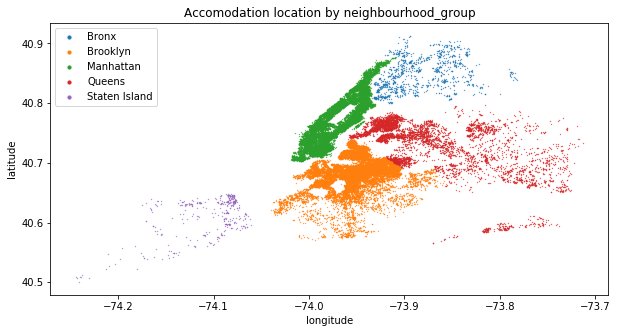

In [ ]:
plt.figure(figsize=(10, 5))
for name, group in data.groupby(['neighbourhood_group']):
    plt.scatter(group['longitude'], group['latitude'], s=0.1, label=name)
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.legend(markerscale=10)
plt.title('Accomodation location by neighbourhood_group')
plt.show()

#### Явное задание цветов в matplotlib

In [ ]:
colors = matplotlib.colors.get_named_colors_mapping()

In [ ]:
list(colors.keys())[:5]

['xkcd:cloudy blue',
 'xkcd:dark pastel green',
 'xkcd:dust',
 'xkcd:electric lime',
 'xkcd:fresh green']

In [ ]:
list(colors.values())[:5]

['#acc2d9', '#56ae57', '#b2996e', '#a8ff04', '#69d84f']

In [ ]:
color_map = {
    'Brooklyn': colors['xkcd:cloudy blue'],
    'Manhattan': colors['xkcd:azul'],
    'Queens': colors['xkcd:electric lime'],
    'Staten Island': colors['xkcd:fresh green'],
    'Bronx': colors['xkcd:warm purple']
}

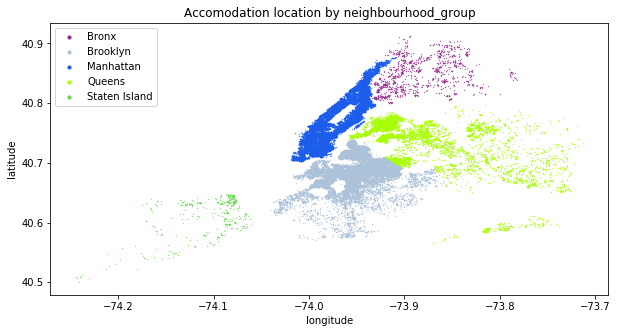

In [ ]:
plt.figure(figsize=(10, 5))
for name, group in data.groupby(['neighbourhood_group']):
    plt.scatter(group['longitude'], group['latitude'], s=0.1, c=color_map[name], label=name)
plt.legend(markerscale=10)
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('Accomodation location by neighbourhood_group')
plt.show()

### Bar, barh

In [ ]:
room_type_size = data.groupby('room_type').size()

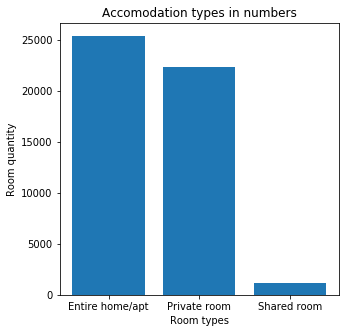

In [ ]:
plt.figure(figsize=(5, 5))
plt.bar(room_type_size.index, room_type_size.values)
plt.xlabel('Room types')
plt.ylabel('Room quantity')
plt.title('Accomodation types in numbers')
plt.show()

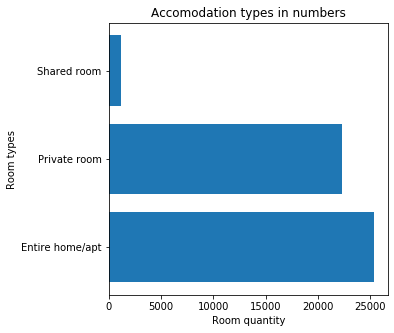

In [ ]:
plt.figure(figsize=(5, 5))
plt.barh(room_type_size.index, room_type_size.values)
plt.xlabel('Room quantity')
plt.ylabel('Room types')
plt.title('Accomodation types in numbers')
plt.show()

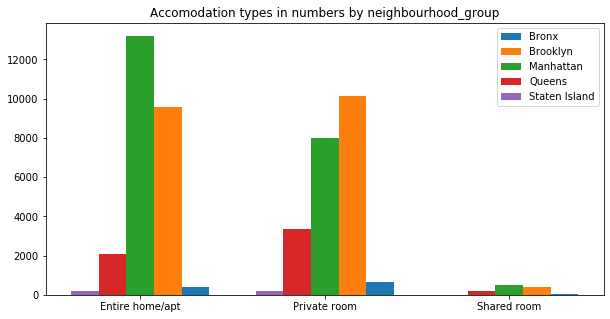

In [ ]:
plt.figure(figsize=(10, 5))
x = np.asarray([0, 1, 2])
width = 0.15
i = -2
for name, group in data.groupby(['neighbourhood_group']):
    plt.bar(x - i*width, group.groupby('room_type').size().values, width, label=name)
    i += 1
plt.title('Accomodation types in numbers by neighbourhood_group')
plt.xticks(x, list(data.groupby('room_type').groups.keys()))
plt.legend()
plt.show()

### Hist

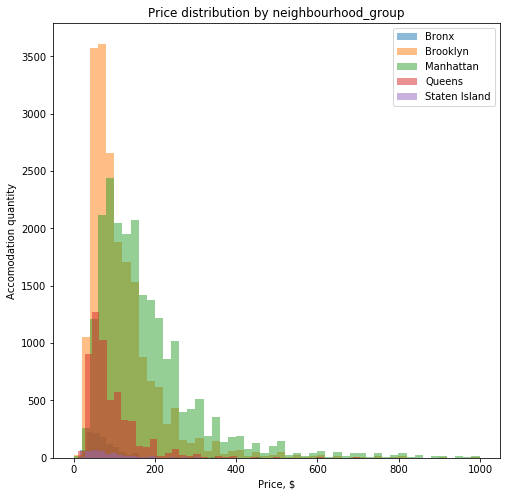

In [ ]:
plt.figure(figsize=(8, 8))
filtered_data = data[data['price'] < 1000]
for name, group in filtered_data.groupby(['neighbourhood_group']):
    plt.hist(group['price'], label=name, bins=50, alpha=0.5)
plt.xlabel('Price, $')
plt.ylabel('Accomodation quantity')
plt.title('Price distribution by neighbourhood_group')
plt.legend()
plt.show()

### Pie

In [ ]:
neighbourhood_group_size = data.groupby(['neighbourhood_group']).size()

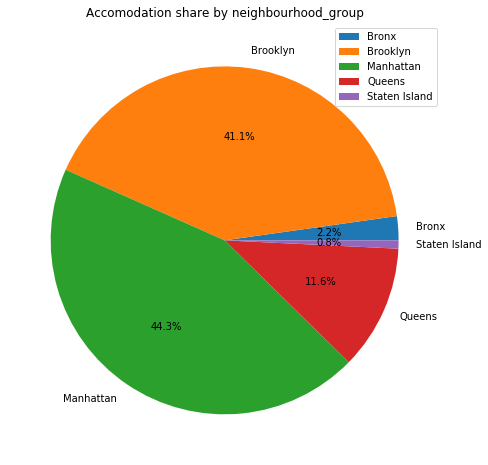

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(neighbourhood_group_size.values, labels=neighbourhood_group_size.index, autopct='%1.1f%%')
plt.legend()
plt.title('Accomodation share by neighbourhood_group')
plt.show()

### Boxplot

  ![title](https://248006.selcdn.ru/public/email/courses/Профессия%20Data%20Scientist/boxplot.png)

In [ ]:
filtered_data = data[data['price'] < 1000]

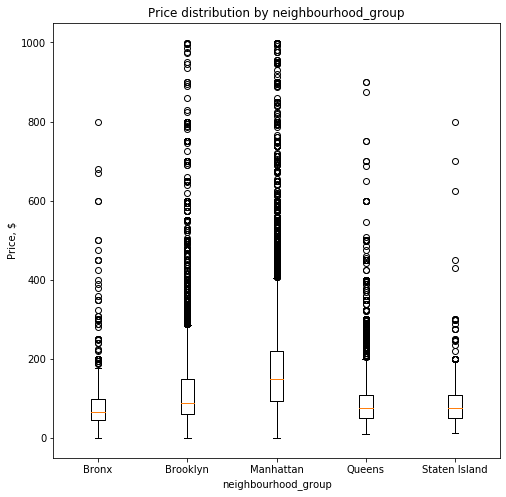

In [ ]:
plt.figure(figsize=(8, 8))
index = 1
for name, group in filtered_data.groupby(['neighbourhood_group']):
    plt.boxplot(group['price'], positions=[index], labels=[name])
    index += 1
plt.xlabel('neighbourhood_group')
plt.ylabel('Price, $')
plt.title('Price distribution by neighbourhood_group')
plt.show()

## Дополнительные материалы

[Основные функции, которые используются для отрисовки графиков разных видов](https://matplotlib.org/3.2.1/api/axes_api.html#plotting)

## Практическое задание

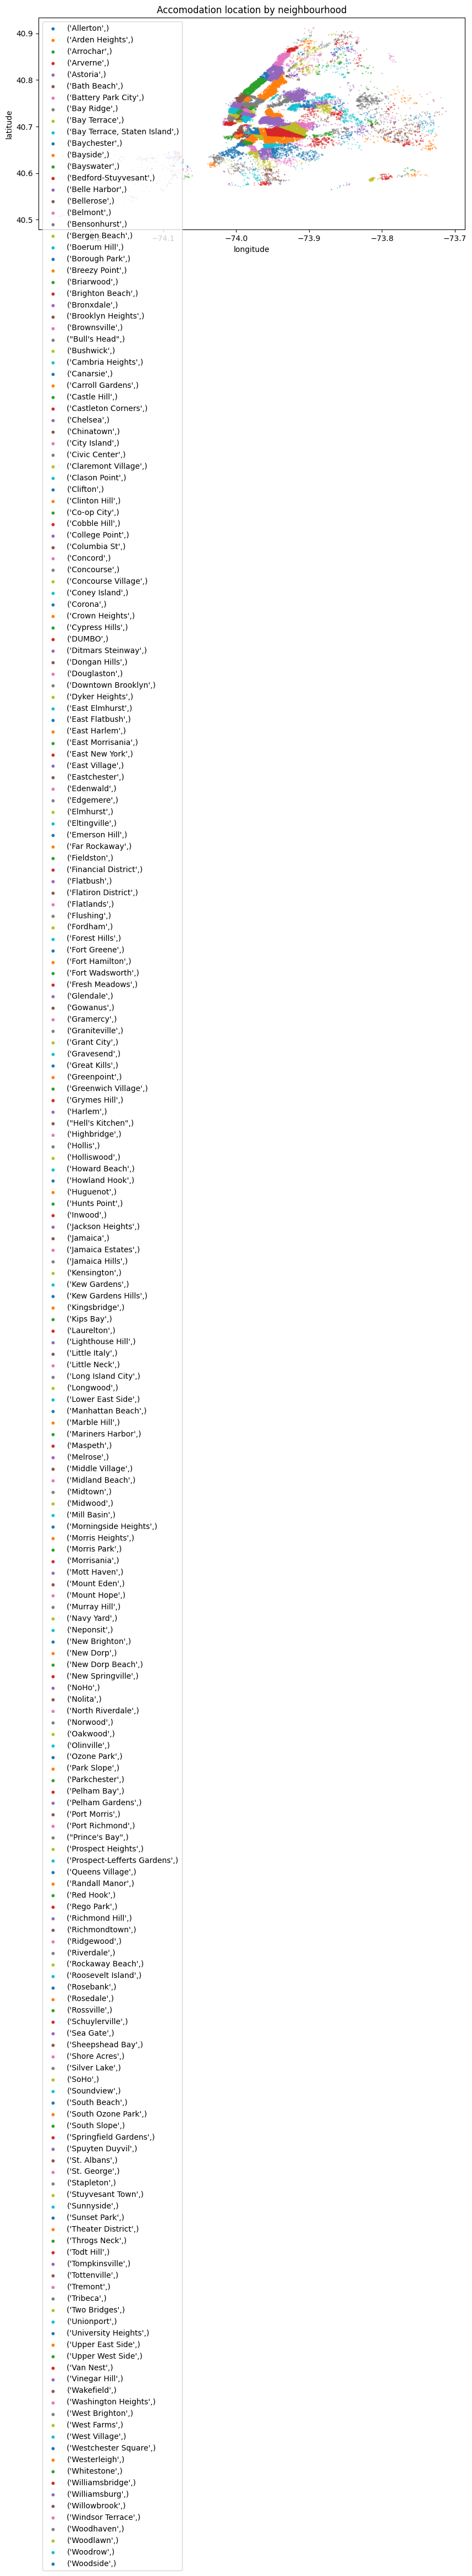

In [11]:
plt.figure(figsize=(10, 5))
for name, group in data.groupby(['neighbourhood']):
    plt.scatter(group['longitude'], group['latitude'], s=0.1, label=name)
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.legend(markerscale=10)
plt.title('Accomodation location by neighbourhood')
plt.show()

- C помощью первого способа и автоматической расстановки цвета постройте такой же график с помощью функции scatter, как на уроке, сгруппировав данные по колонке neighbourhood (мы использовали в примере neighbourhood_group).
- C помощью одного вызова функции scatter постройте точки по координатам, использовав при этом в качестве цвета колонку availability_365, для отображения соответствия цвета значения используйте функцию colorbar.
- Используйте пример из урока по функции bar и измените группировку: покажите количество жилья разных типов по административному округу (neighbourhood_group).
- Повторите то же самое, что делали на уроке с hist, для number_reviews.
- Используйте boxplot для визуализации распределения number_reviews по neighbourhood_group.

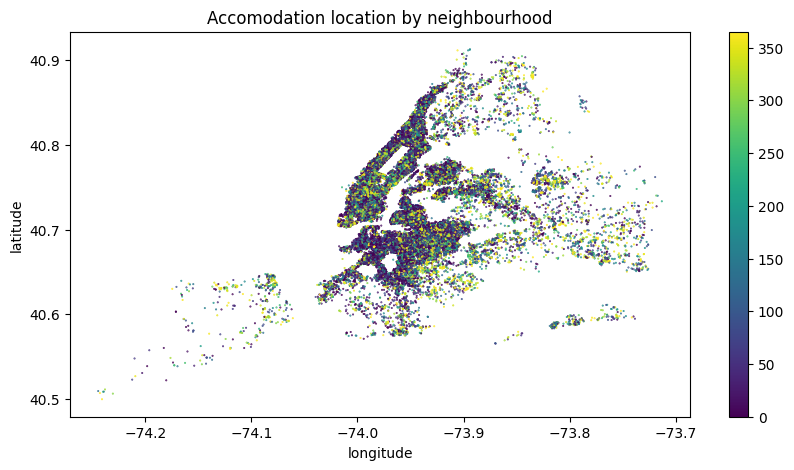

In [29]:
plt.figure(figsize=(10, 5))
dataAstoria = data[data['neighbourhood'] == 'Astoria']

# sc = plt.scatter(dataAstoria['longitude'], dataAstoria['latitude'], s=2, c=dataAstoria['availability_365'], label='Astoria')
# plt.colorbar(sc, label="Colors name")
plt.scatter(data['longitude'], data['latitude'], s=0.2, c=data['availability_365'])
plt.colorbar()
plt.xlabel('longitude')
plt.ylabel('latitude')
# plt.legend(markerscale=10)
plt.title('Accomodation location by neighbourhood')
plt.show()

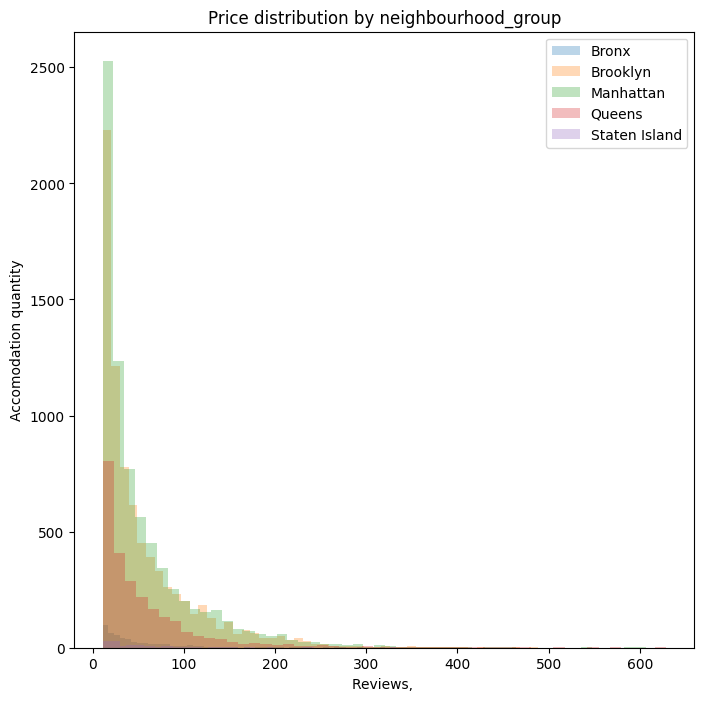

In [27]:
plt.figure(figsize=(8, 8))
filtered_data = data[data['number_of_reviews'] > 10]
for name, group in filtered_data.groupby(['neighbourhood_group']):
    plt.hist(group['number_of_reviews'], label=name, bins=50, alpha=0.3)
plt.xlabel('Reviews, ')
plt.ylabel('Accomodation quantity')
plt.title('Price distribution by neighbourhood_group')
plt.legend()
plt.show()

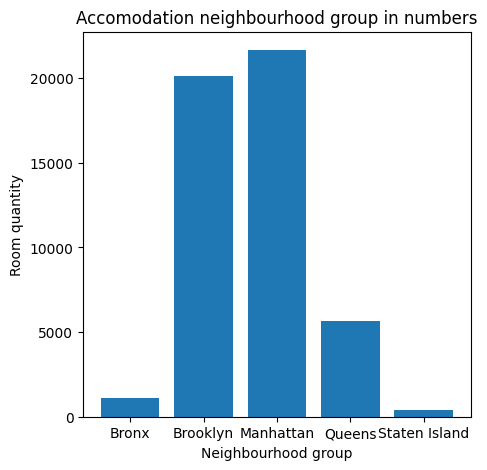

In [23]:
room_type_size = data.groupby('neighbourhood_group').size()
plt.figure(figsize=(5, 5))
plt.bar(room_type_size.index, room_type_size.values)
plt.xlabel('Neighbourhood group')
plt.ylabel('Room quantity')
plt.title('Accomodation neighbourhood group in numbers')
plt.show()

C:\Users\Strannik\AppData\Local\Temp\ipykernel_15268\3535991258.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


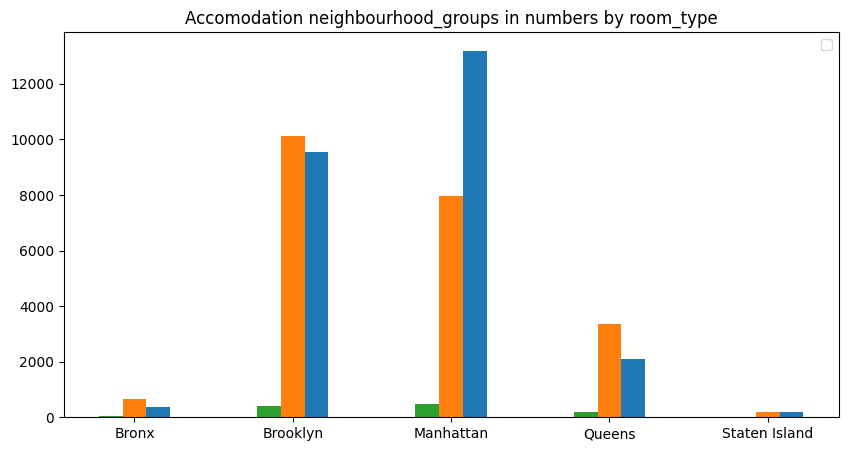

In [34]:
plt.show()
plt.figure(figsize=(10, 5))
x = np.asarray([0, 1, 2, 3, 4])
width = 0.15
i = -1
for name, group in data.groupby(['room_type']):
    plt.bar(x - i * width, group.groupby('neighbourhood_group').size().values, width)
    # plt.bar(x - i * width, group.groupby('neighbourhood_group').size().values, width, labels=name)
    i += 1
plt.title('Accomodation neighbourhood_groups in numbers by room_type')
plt.xticks(x, list(data.groupby('neighbourhood_group').groups.keys()))
plt.legend()
plt.show()

C:\Users\Strannik\AppData\Local\Temp\ipykernel_15268\4285809016.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(group['number_of_reviews'], positions=[index], labels=[name])
C:\Users\Strannik\AppData\Local\Temp\ipykernel_15268\4285809016.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(group['number_of_reviews'], positions=[index], labels=[name])
C:\Users\Strannik\AppData\Local\Temp\ipykernel_15268\4285809016.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(group['number_of_reviews'], positions=[index], labels=[name])
C:\Users\Strannik\AppData\Local\Temp\ipykernel_15268\42

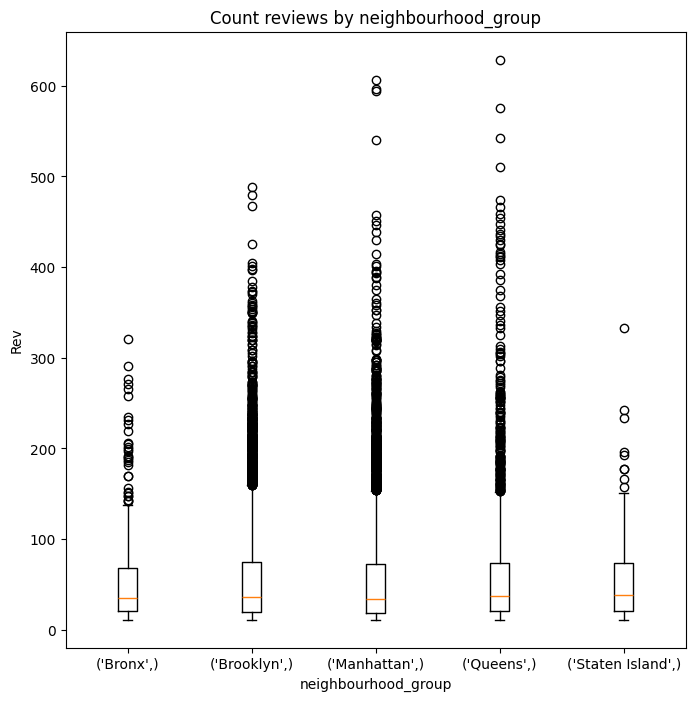

In [28]:
filtered_data = data[data['number_of_reviews'] > 10]
plt.figure(figsize=(8, 8))
index = 1
for name, group in filtered_data.groupby(['neighbourhood_group']):
    plt.boxplot(group['number_of_reviews'], positions=[index], labels=[name])
    index += 1
plt.xlabel('neighbourhood_group')
plt.ylabel('Rev count')
plt.title('Count reviews by neighbourhood_group')
plt.show()